Aluno: Pedro Lucas Castro de Andrade

Nusp: 11212289

## Imports de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando o dataset e vizualizando parte de seu conteúdo

In [2]:
df = pd.read_csv('ProcessoSeletivo.csv')
df.dropna(inplace=True)
print('O total de alunos participantes é: {}'.format(df.shape[0]))
df.head(5)

O total de alunos participantes é: 3000


,Id_aluno,Selecionado,Sexo,OrientacaoSexual,Idade,Raça-cor,Deficiência
0,6540,Sim,F,Bissexual,25,Amarela,Não possuo
1,16980,Sim,M,Heterossexual,24,Não informada,Não possuo
2,7135,Não,F,Prefiro não responder,22,Branca,Não possuo
3,687,Não,M,Homossexual,20,Preta / negra,Não possuo
4,4387,Sim,F,Heterossexual,21,Branca,Não possuo


A seguir, fez-se uma devisão entre os alunos selecionados e os não selecionados

A porcentagem de estudantes selecionados é de: 64.23%
A porcentagem de não estudantes selecionados é de: 35.77%


,Selecionado,Total
0,Sim,1927
1,Não,1073


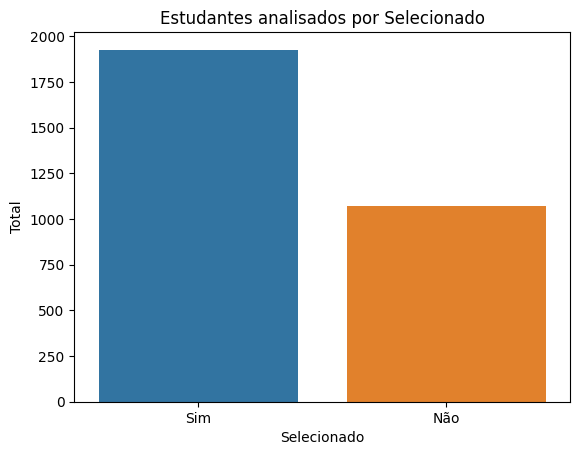

In [3]:
df_selecionado = df.Selecionado.value_counts().to_frame().reset_index()
df_selecionado.columns = ['Selecionado', 'Total']
print('A porcentagem de estudantes selecionados é de: {:.2f}%'.format(100*(df_selecionado.iloc[0,1]/df.shape[0])))
print('A porcentagem de não estudantes selecionados é de: {:.2f}%'.format(100*(df_selecionado.iloc[1,1]/df.shape[0])))
ax = sns.barplot(x='Selecionado', y='Total', data=df_selecionado)
ax.set_title('Estudantes analisados por Selecionado')
df_selecionado

Criandos dois DFs, de forma a separar os separados dos não separados

In [4]:
df_sim = df.query("Selecionado == 'Sim'")
df_nao = df.query("Selecionado == 'Não'")

Criando um gráfico para observar a distribuição de idade entre os selecionados e os não selecionados

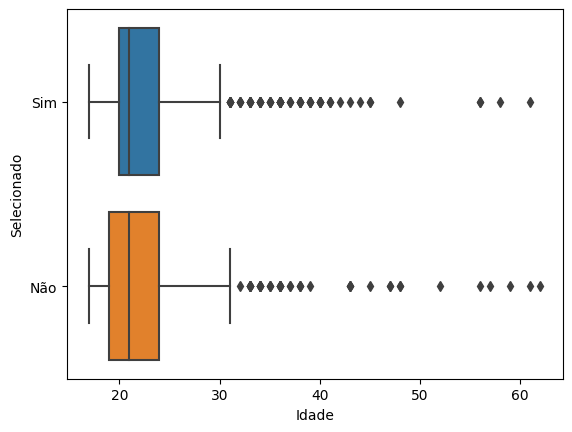

In [87]:
ax = sns.boxplot(x='Idade', y='Selecionado', data=df)

Percebe-se que, tanto entre os selecionados quanto entre os não selecionados, a densidade de idade se encontra entre os 20 anos

O trecho de código a seguir faz uma tabela de frequência entre todos os estudantes

In [90]:
df2 = df.groupby(['OrientacaoSexual', 'Raça-cor', 'Deficiência', 'Sexo']).size().unstack(fill_value=0)
df2

Sexo                                                                  F   M
OrientacaoSexual      Raça-cor      Deficiência                            
Bissexual             Amarela       Não possuo                       10   1
                      Branca        Deficiência Física                1   0
                                    Deficiência Mental/Intelectual    0   2
                                    Não possuo                      246  86
                                    Outro                             1   3
...                                                                 ...  ..
Prefiro não responder Não informada Não possuo                        3   6
                      Parda         Deficiência Visual                1   0
                                    Não possuo                       34  11
                                    Outro                             1   0
                      Preta / negra Não possuo                        6   5

[80 rows x 2 columns]

A seguir, observa-se qual é o perfil mais presente entre os candidatos

In [91]:
df2_max = pd.concat([df2.idxmax(), df2.max()], axis=1)
df2_max

,0,1
Sexo,,
F,"(Heterossexual, Branca, Não possuo)",465
M,"(Heterossexual, Branca, Não possuo)",479


In [93]:
print('A porcentagem de candidatas mulheres, heterossexuais, brancas e sem deficiência é de: {:.2f}%'.format(100*(df2_max[1][0]/df.shape[0])))
print('A porcentagem de candidatos homens, heterossexuais, brancos e sem deficiência é de: {:.2f}%'.format(100*(df2_max[1][1]/df.shape[0])))

A porcentagem de candidatas mulheres, heterossexuais, brancas e sem deficiência é de: 15.50%
A porcentagem de candidatos homens, heterossexuais, brancos e sem deficiência é de: 15.97%


Percebe-se que o perfil mais presente é: **homem, branco, heterossexual e sem deficiência**

# Analisando Colunas em Conjunto

## Analisando os Selecionados

Criação de um DF em que seja possível analisar a frequência de **estudantes selecionados** considerando Sexo, Orientação Sexual, Raça-cor e Deficiência em conjunto

In [69]:
df4 = df_sim.groupby(['OrientacaoSexual', 'Raça-cor', 'Deficiência', 'Sexo']).size().unstack(fill_value=0)
df4

Sexo                                                                  F   M
OrientacaoSexual      Raça-cor      Deficiência                            
Bissexual             Amarela       Não possuo                        5   1
                      Branca        Deficiência Física                1   0
                                    Deficiência Mental/Intelectual    0   2
                                    Não possuo                      143  44
                                    Outro                             0   3
...                                                                 ...  ..
Prefiro não responder Branca        Não possuo                       22  23
                      Não informada Não possuo                        1   4
                      Parda         Não possuo                       25   7
                                    Outro                             1   0
                      Preta / negra Não possuo                        3   5

[67 rows x 2 columns]

Visualizar o conjunto de respostas que mais apareceram dentre os **estudantes selecionados**

In [40]:
df4_max = pd.concat([df4.idxmax(), df4.max()], axis=1)
df4_max

,0,1
Sexo,,
F,"(Heterossexual, Branca, Não possuo)",258
M,"(Heterossexual, Branca, Não possuo)",266


In [86]:
print('A porcentagem de selecionadas mulheres, heterossexuais, brancas e sem deficiência é de: {:.2f}%'.format(100*(df4_max[1][0]/df_sim.shape[0])))
print('A porcentagem de selecionados homens, heterossexuais, brancos e sem deficiência é de: {:.2f}%'.format(100*(df4_max[1][1]/df_sim.shape[0])))

A porcentagem de selecionadas mulheres, heterossexuais, brancas e sem deficiência é de: 13.39%
A porcentagem de selecionados homens, heterossexuais, brancos e sem deficiência é de: 13.80%


Assim, percebe-se que o perfil mais selecionado é o de: **homem, branco, heterossexual e sem deficiência**. Sobre a idade, uma análise anterior mostrou que os selecionados se concentravam entre estudantes com pouco mais de 20 anos.

In [95]:
print('No total entre homens, heterossexuais, brancos e sem deficiência, foram selecionados: {:.2f}%'.format(100*(df4_max[1][1]/df2_max[1][1])))

No total entre homens, heterossexuais, brancos e sem deficiência, foram selecionados: 55.53%


Com isso, apesar desse ser o perfil mais presente dentre os candidatos, pode-se estabelecer uma discussão acerca da tendência aos valores ditos como padrões pela estrutura social vigente.

## Analisando os Não Selecionados

In [72]:
df5 = df_nao.groupby(['OrientacaoSexual', 'Raça-cor', 'Deficiência', 'Sexo']).size().unstack(fill_value=0)
df5

Sexo                                                                        F  \
OrientacaoSexual      Raça-cor      Deficiência                                 
Bissexual             Amarela       Não possuo                              5   
                      Branca        Não possuo                            103   
                                    Outro                                   1   
                      Não informada Deficiência Auditiva                    0   
                                    Deficiência Mental/Intelectual          0   
                                    Não possuo                              4   
                      Parda         Não possuo                             25   
                                    Outro                                   0   
                                    TEA – Transtorno Espectro do Autismo    1   
                      Preta / negra Não possuo                             10   
                                    Outro                                   0   
Heterossexual         Amarela       Não possuo                             11   
                                    Outro                                   0   
                      Branca        Deficiência Física                      2   
                                    Deficiência Mental/Intelectual          0   
                                    Deficiência Visual                      2   
                                    Não possuo                            207   
                                    Outro                                   1   
                                    TEA – Transtorno Espectro do Autismo    1   
                      Indígena      Não possuo                              0   
                      Não informada Não possuo                             15   
                                    Outro                                   0   
                      Parda         Deficiência Física                      1   
                                    Deficiência Visual                      0   
                                    Não possuo                             64   
                                    Outro                                   2   
                                    TEA – Transtorno Espectro do Autismo    0   
                      Preta / negra Deficiência Mental/Intelectual          1   
                                    Não possuo                             21   
Homossexual           Amarela       Não possuo                              1   
                      Branca        Deficiência Visual                      1   
                                    Não possuo                             14   
                                    Outro                                   1   
                                    TEA – Transtorno Espectro do Autismo    1   
                      Indígena      Não possuo                              0   
                      Parda         Não possuo                              2   
                                    TEA – Transtorno Espectro do Autismo    1   
                      Preta / negra Não possuo                              1   
                                    TEA – Transtorno Espectro do Autismo    1   
Outro                 Branca        Deficiência Visual                      1   
                                    Não possuo                              1   
Pansexual             Amarela       Não possuo                              1   
                      Branca        Não possuo                              9   
                                    TEA – Transtorno Espectro do Autismo    0   
                      Parda         Deficiência Mental/Intelectual          1   
                                    Não possuo                              6   
                      Preta / negra Não possuo                              2   
Prefiro não responder Amarela  

In [73]:
df5_max = pd.concat([df5.idxmax(), df5.max()], axis=1)
df5_max

,0,1
Sexo,,
F,"(Heterossexual, Branca, Não possuo)",207
M,"(Heterossexual, Branca, Não possuo)",213


In [88]:
print('A porcentagem de não selecionadas mulheres, heterossexuais, brancas e sem deficiência é de: {:.2f}%'.format(100*(df5_max[1][0]/df_nao.shape[0])))
print('A porcentagem de não selecionados homens, heterossexuais, brancos e sem deficiência é de: {:.2f}%'.format(100*(df5_max[1][1]/df_nao.shape[0])))

A porcentagem de não selecionadas mulheres, heterossexuais, brancas e sem deficiência é de: 19.29%
A porcentagem de não selecionados homens, heterossexuais, brancos e sem deficiência é de: 19.85%


Dessa forma, observa-se que o perfil menos selecionado também é de **homem, branco, heterossexual e sem deficiência**. Isso ocorre devido ao alto número de candidatos com esse perfil.